In [1]:
CUDA_INDEX = 0
NAME = 'GED_AIDS700nef'
CLASSES = 29

In [2]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../pyged/lib')

In [3]:
import os
import pickle
import random
import time

import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.set_device(CUDA_INDEX)
torch.backends.cudnn.benchmark = True
import torch.optim
import torch_geometric as tg
import torch_geometric.data
from tqdm.auto import tqdm

from neuro import config, datasets, metrics, models, train, utils, viz
import pyged

from importlib import reload
reload(config)
reload(datasets)
reload(metrics)
reload(models)
reload(pyged)
reload(train)
reload(utils)
reload(viz)

/home/nyati_pranav26/Pranav/gnn-x-experiments/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'neuro.viz' from '/home/nyati_pranav26/Pranav/gnn-x-experiments/GREED/greed/nbs_pred/../neuro/viz.py'>

In [4]:
model = models.NormGEDModel(8, CLASSES, 64, 64)
model.load_state_dict(torch.load(f'../runlogs/{NAME}/1621925721.9678917/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [5]:
norm_model = models.NormGEDModel(8, CLASSES, 64, 64)
norm_model.load_state_dict(torch.load(f'../runlogs/{NAME}-Norm/1621949424.1548285/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [6]:
nn_model = models.NeuralSiameseModel(8, CLASSES, 64, 64)

# nn_model.load_state_dict(torch.load(f'../runlogs/{NAME}-NN/1621844409.2529492/best_model.pt', map_location='cpu'))
nn_model.load_state_dict(torch.load(f'../runlogs/{NAME}-NN/1622014325.6125388/best_model.pt', map_location='cpu'))

<All keys matched successfully>

In [7]:
# dual_model = models.DualNormSEDModel(8, CLASSES, 64, 64)
# dual_model.load_state_dict(torch.load(f'../runlogs/{NAME}-Dual/1621844415.90946/best_model.pt', map_location='cpu'))

In [8]:
# inner_test_set, _ = torch.load(f'../data/{NAME}/inner_test.pt', map_location='cpu')
inner_test_set = torch.load(f'../data/{NAME}/inner_test.pt', map_location='cpu')
inner_queries, inner_targets, _, _ = inner_test_set
# inner_queries, inner_targets = inner_test_set

print("INNER QUERIES:")
print("Len of inner_queries:", len(inner_queries))
print("Type of inner_queries:", type(inner_queries))
print("Type of inner_queries[0]:", type(inner_queries[0]))
print("Len of inner_queries[0]:", len(inner_queries[0]))
print("inner_queries[0]:", inner_queries[0])

# for i in range(len(inner_queries)):
for i in range(10):
    print(f"Query {i}:")
    print("Num nodes:", inner_queries[i].num_nodes)
    print("Num edges:", inner_queries[i].num_edges)
    print("Graph node shape:", inner_queries[i].x.shape)
    print("Graph nodes:", inner_queries[i].x)
    # print("Graph node features:", inner_queries[i].node)
    print("Graph edges:", inner_queries[i].edge_index)
    
    
print("\n\nINNER TARGETS:")
print("Len of inner_targets:", len(inner_targets))
print("Type of inner_targets:", type(inner_targets))
print("Type of inner_targets[0]:", type(inner_targets[0]))
print("Len of inner_targets[0]:", len(inner_targets[0]))
print("inner_targets[0]:", inner_targets[0])

# for i in range(len(inner_targets)):
for i in range(10):
    print(f"Target {i}:")
    print("Num nodes:", inner_targets[i].num_nodes)
    print("Num edges:", inner_targets[i].num_edges)
    print("Graph node shape:", inner_targets[i].x.shape)
    print("Graph nodes:", inner_targets[i].x)
    # print("Graph node features:", inner_targets[i].node_)
    print("Graph edges:", inner_targets[i].edge_index)
    
total_query_nodes=0
for i in range(len(inner_queries)):
    total_query_nodes += inner_queries[i].num_nodes
    
print("Total query nodes:", total_query_nodes)

total_target_nodes=0
for i in range(len(inner_targets)):
    total_target_nodes += inner_targets[i].num_nodes
    
print("Total target nodes:", total_target_nodes)
    

INNER QUERIES:
Len of inner_queries: 500
Type of inner_queries: <class 'list'>
Type of inner_queries[0]: <class 'torch_geometric.data.data.Data'>
Len of inner_queries[0]: 2
inner_queries[0]: Data(x=[8, 29], edge_index=[2, 16])
Query 0:
Num nodes: 8
Num edges: 16
Graph node shape: torch.Size([8, 29])
Graph nodes: tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

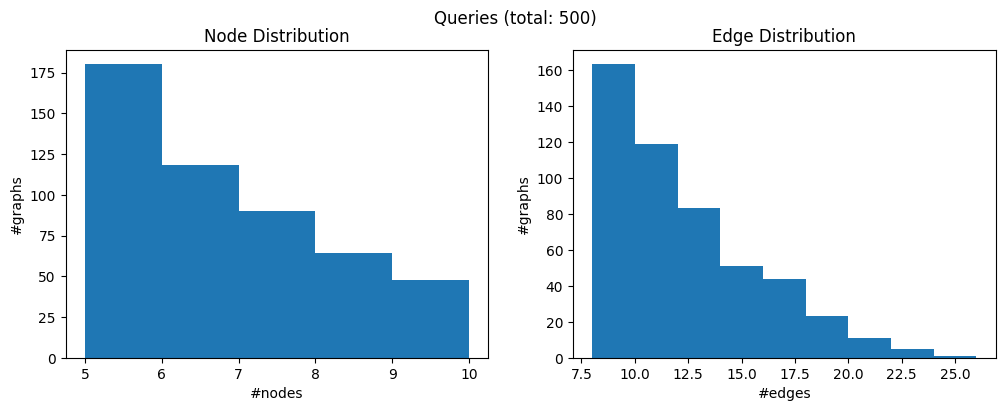

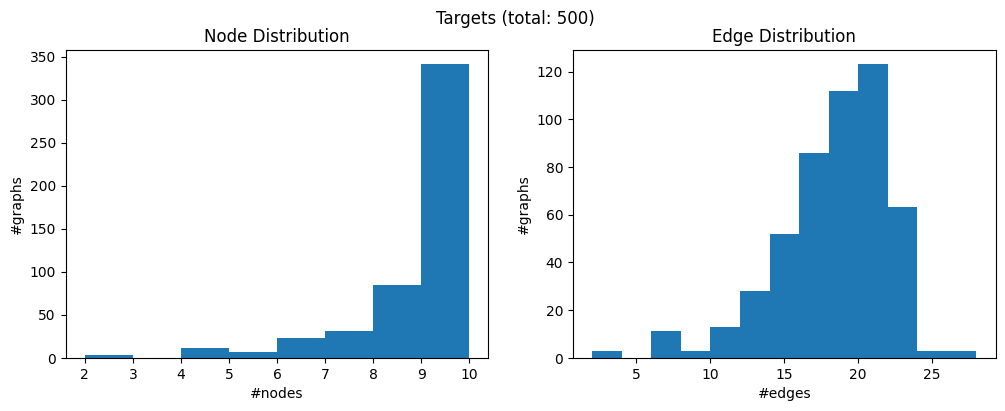

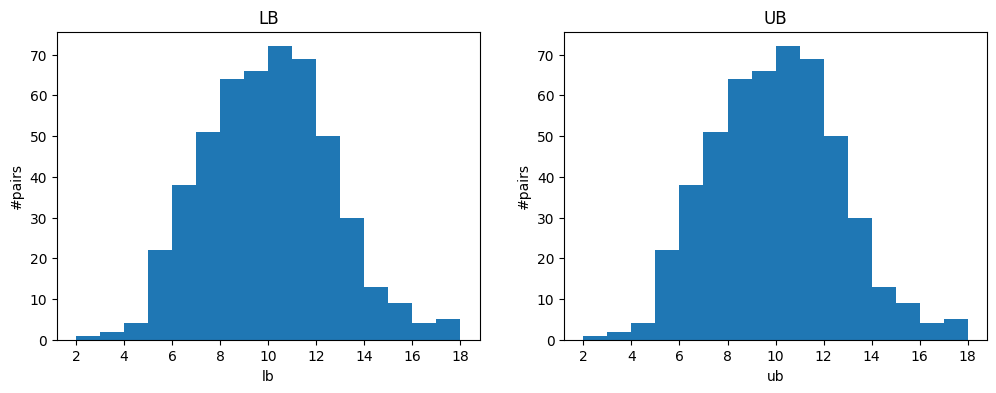

In [9]:
viz.plot_dataset_dist(inner_test_set)

In [10]:
config.n_workers = 1
tic = time.time()
inner_pred = model.predict_inner(inner_queries, inner_targets)
toc = time.time()
torch.save(inner_pred, f'../preds/{NAME}/inner_pred.pt')
print(f'NeuroGSim prediction time: {toc-tic:.3f}s')

direct predict inner dataset
Siamese_model forward: g shape=>  torch.Size([3194, 29])
Siamese_model forward: h shape=>  torch.Size([4388, 29])
NeuroGSim prediction time: 2.974s


In [11]:
tic = time.time()
norm_inner_pred = norm_model.predict_inner(inner_queries, inner_targets)
toc = time.time()
torch.save(norm_inner_pred, f'../preds/{NAME}/norm_inner_pred.pt')
print(f'NeuroGSim-Norm prediction time: {toc-tic:.3f}s')

direct predict inner dataset
Siamese_model forward: g shape=>  torch.Size([3194, 29])
Siamese_model forward: h shape=>  torch.Size([4388, 29])
NeuroGSim-Norm prediction time: 0.028s


In [12]:
tic = time.time()
nn_inner_pred = nn_model.predict_inner(inner_queries, inner_targets)
toc = time.time()
torch.save(nn_inner_pred, f'../preds/{NAME}/nn_inner_pred.pt')
print(f'NeuroGSim-NN prediction time: {toc-tic:.3f}s')

direct predict inner dataset
Siamese_model forward: g shape=>  torch.Size([3194, 29])
Siamese_model forward: h shape=>  torch.Size([4388, 29])
NeuroGSim-NN prediction time: 0.024s


In [13]:
# tic = time.time()
# dual_inner_pred = dual_model.predict_inner(inner_queries, inner_targets)
# toc = time.time()
# torch.save(dual_inner_pred, f'../preds/{NAME}/dual_inner_pred.pt')
# print(f'NeuroGSim-Dual prediction time: {toc-tic:.3f}s')

## Unweighted Norm GED Model

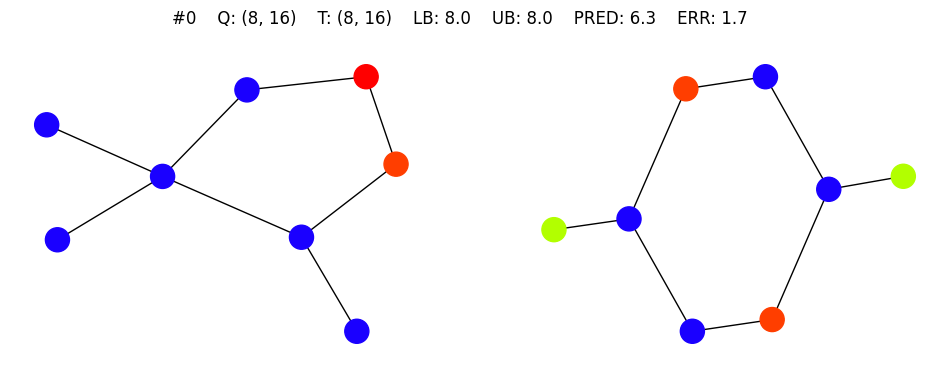

---

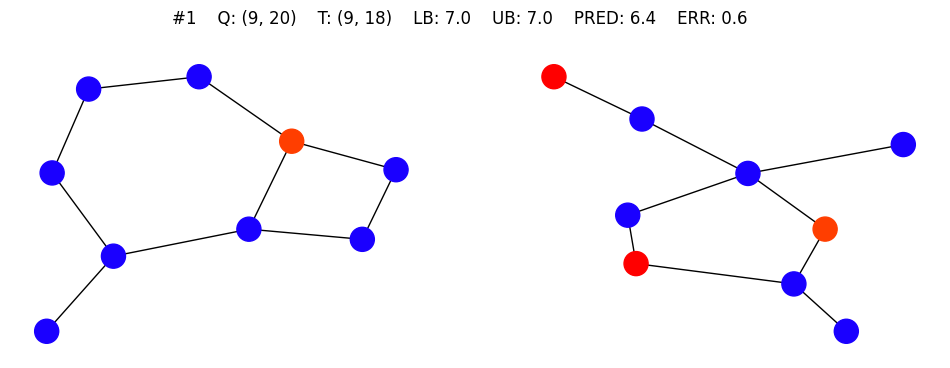

---

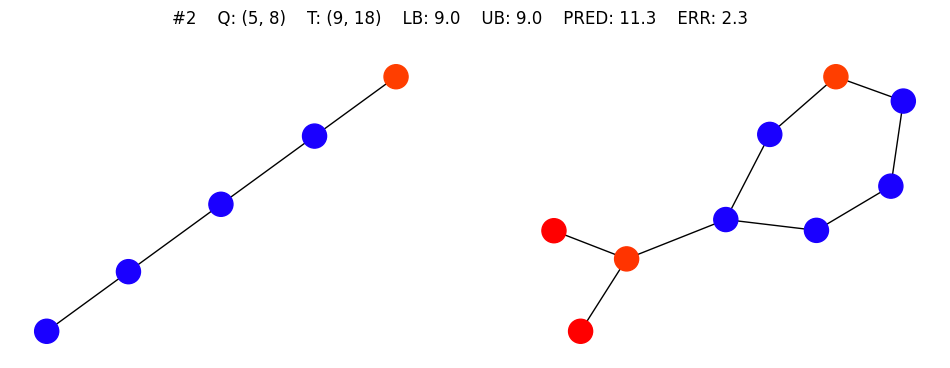

---

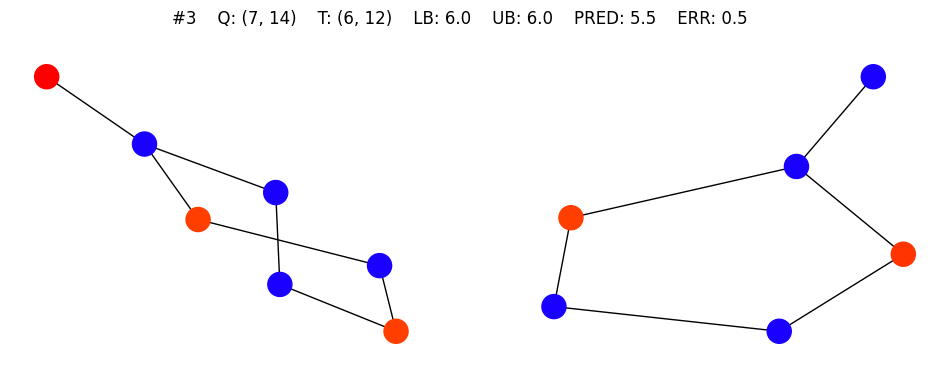

---

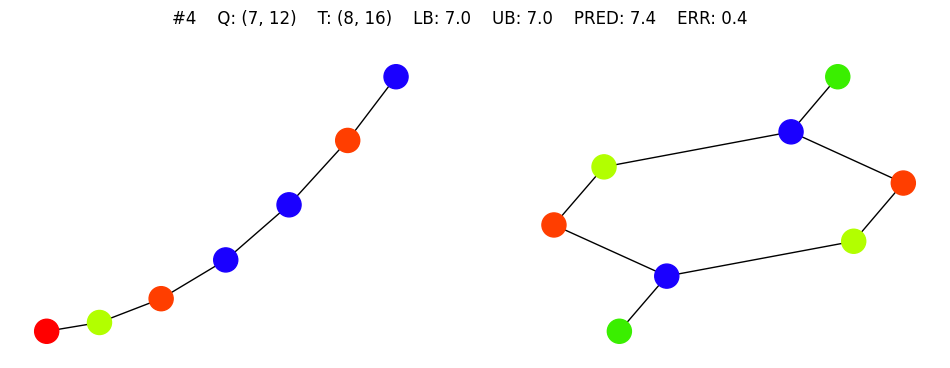

---

In [14]:
viz.plot_inner_dataset(inner_test_set, inner_pred, n_items=5)

## Weighted Norm GED Model

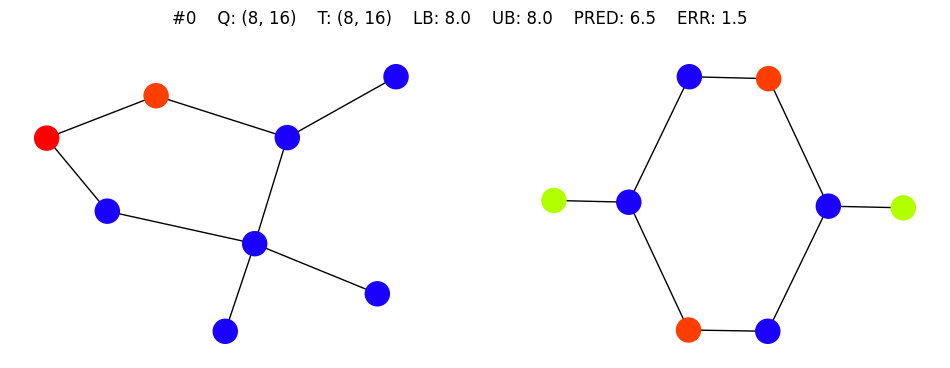

---

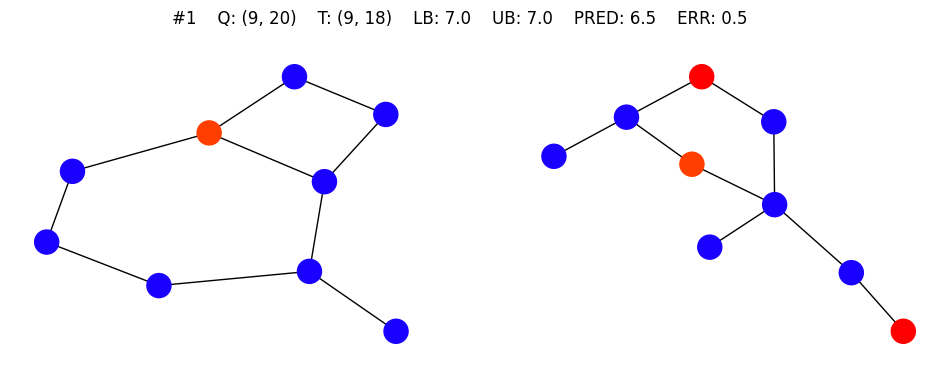

---

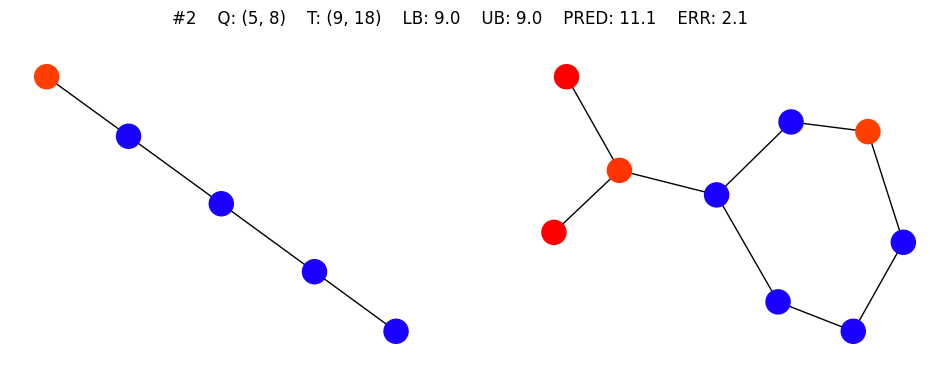

---

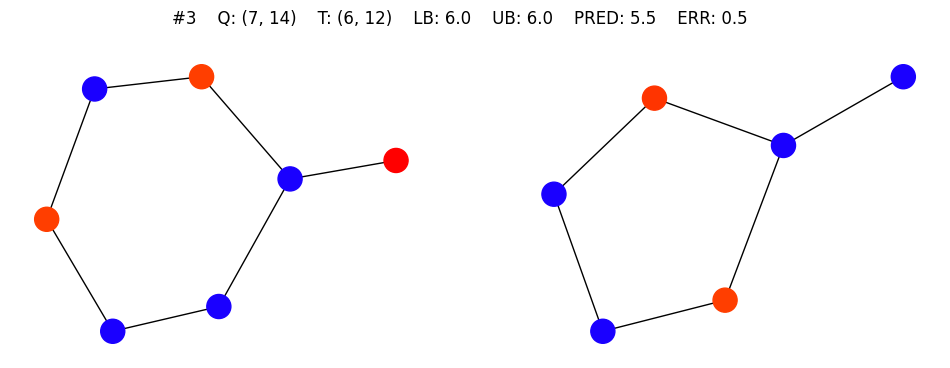

---

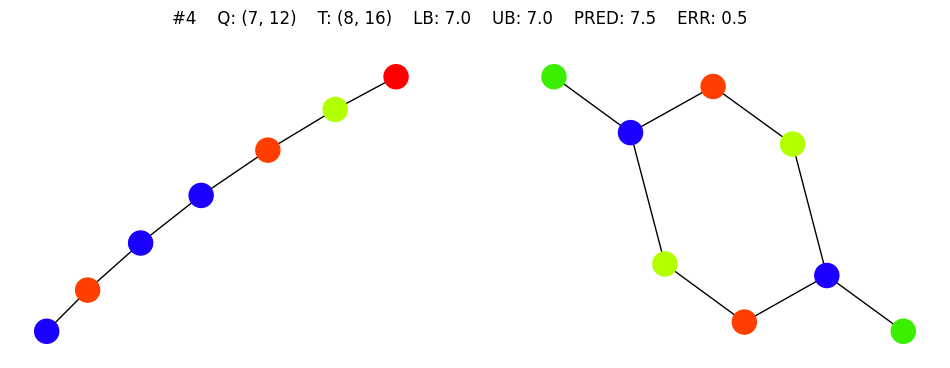

---

In [15]:
viz.plot_inner_dataset(inner_test_set, norm_inner_pred, n_items=5)

## Neural Siamese Model

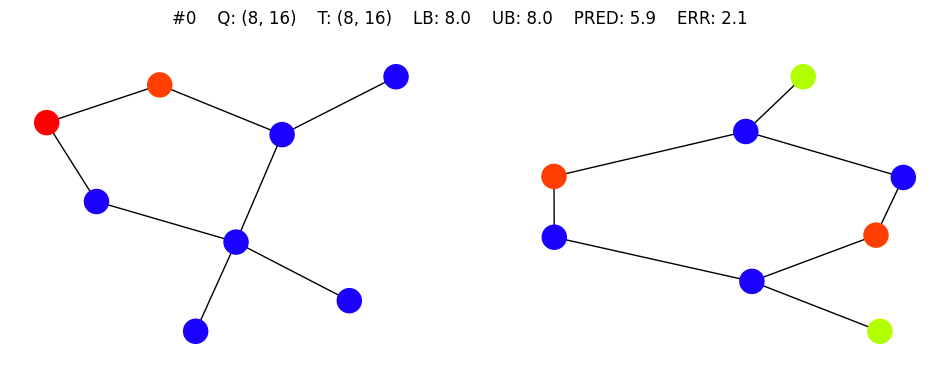

---

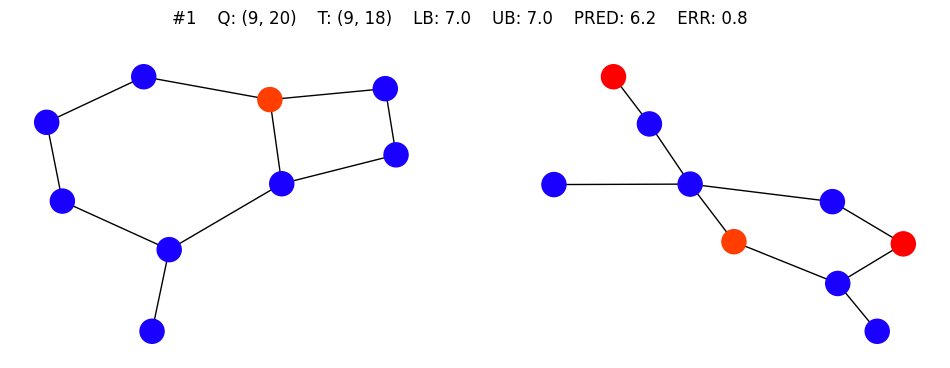

---

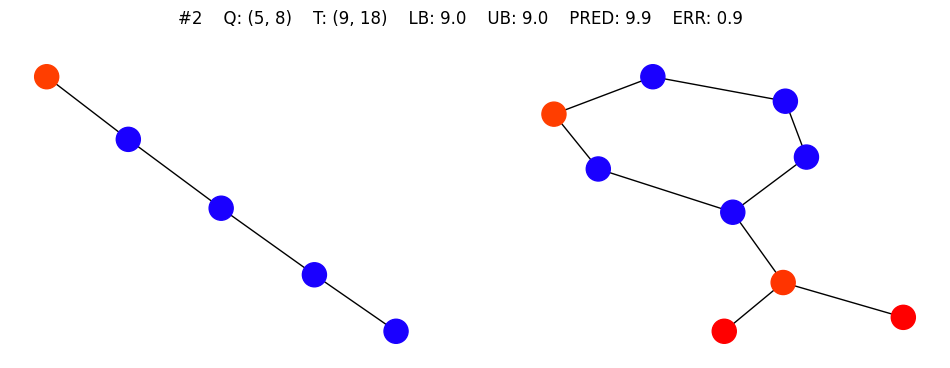

---

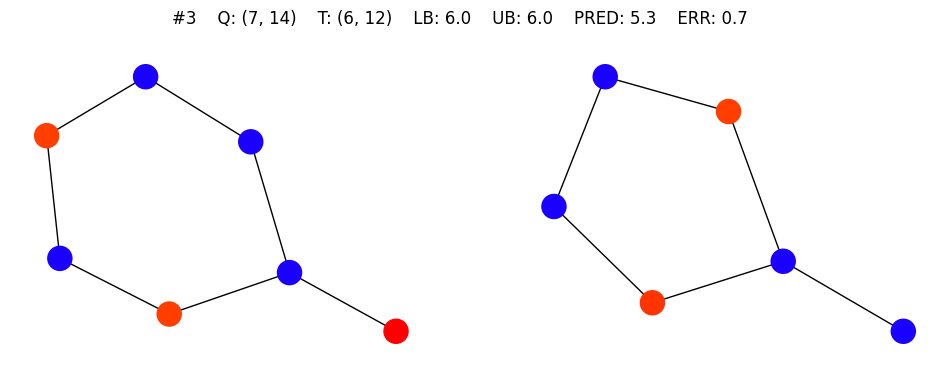

---

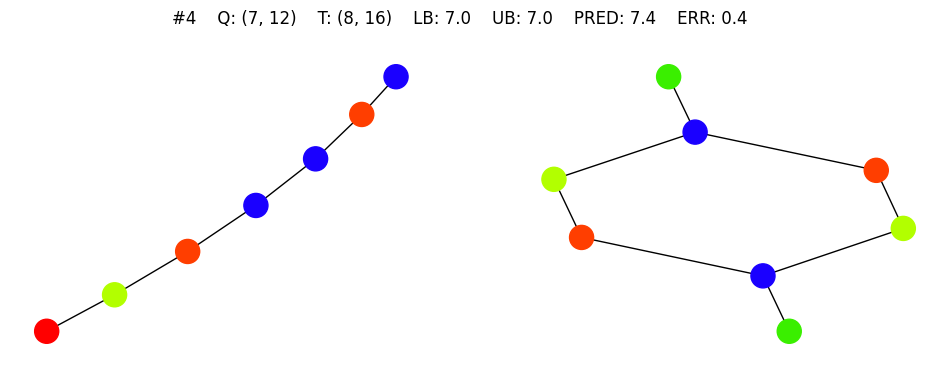

---

In [16]:
viz.plot_inner_dataset(inner_test_set, nn_inner_pred, n_items=5)

### Write the average errors to the output file

In [20]:
# make an inner_logs directory if it doesn't exist
if not os.path.exists(f'../preds/{NAME}/inner_logs'):
    os.makedirs(f'../preds/{NAME}/inner_logs')

log_file_unweighted = f'../preds/{NAME}/inner_logs/inner_test_unweighted_NORM_GED.log'
log_file_weighted = f'../preds/{NAME}/inner_logs/inner_test_weighted_NORM_GED.log'
log_file_nn_model = f'../preds/{NAME}/inner_logs/inner_test_nn_Neural_Siamese.log'

csv_file_unweighted = f'../preds/{NAME}/inner_logs/inner_test_unweighted_NORM_GED.csv'
csv_file_weighted = f'../preds/{NAME}/inner_logs/inner_test_weighted_NORM_GED.csv'
csv_file_nn_model = f'../preds/{NAME}/inner_logs/inner_test_nn_Neural_Siamese.csv'

viz.log_prediction_results(inner_test_set, inner_pred, logfile=log_file_unweighted)
viz.log_prediction_results(inner_test_set, norm_inner_pred, logfile=log_file_weighted)
viz.log_prediction_results(inner_test_set, nn_inner_pred, logfile=log_file_nn_model)

viz.save_results_to_csv(inner_test_set, inner_pred, csvpath=csv_file_unweighted)
viz.save_results_to_csv(inner_test_set, norm_inner_pred, csvpath=csv_file_weighted)
viz.save_results_to_csv(inner_test_set, nn_inner_pred, csvpath=csv_file_nn_model)


Results saved to ../preds/GED_AIDS700nef/inner_logs/inner_test_unweighted_NORM_GED.csv
Results saved to ../preds/GED_AIDS700nef/inner_logs/inner_test_weighted_NORM_GED.csv
Results saved to ../preds/GED_AIDS700nef/inner_logs/inner_test_nn_Neural_Siamese.csv


In [21]:
config.n_workers = 1
config.method_name = ['ged_branch']
config.method_args = ['']
tic = time.time()
b_inner_lb, b_inner_ub = datasets.inner_sed(inner_queries, inner_targets)
b_inner_pred = (b_inner_lb+b_inner_ub)/2
toc = time.time()
torch.save(b_inner_pred, f'../preds/{NAME}/b_inner_pred.pt')
print(f'Branch prediction time: {toc-tic:.3f} s ')


compute inner sed (bounds only)
n_workers: 1
method_name: ['ged_branch']
method_args: ['']


pairs: 100%|██████████| 500/500 [00:00<00:00, 2091.25it/s]

Branch prediction time: 0.251 s 


In [22]:
config.n_workers = 1
config.method_name = ['ged_f2']
config.method_args = ['--time-limit 0.1']
tic = time.time()
f2_inner_lb, f2_inner_ub = datasets.inner_sed(inner_queries, inner_targets)
f2_inner_pred = (f2_inner_lb+f2_inner_ub)/2
toc = time.time()
torch.save(f2_inner_pred, f'../preds/{NAME}/f2_inner_pred.pt')
print(f'F2 prediction time: {toc-tic:.3f} s ')

compute inner sed (bounds only)
n_workers: 1
method_name: ['ged_f2']
method_args: ['--time-limit 0.1']


pairs:   0%|          | 0/500 [00:00<?, ?it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   0%|          | 2/500 [00:00<00:48, 10.23it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   1%|          | 6/500 [00:00<00:22, 21.95it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   2%|▏         | 11/500 [00:00<00:18, 26.88it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   4%|▍         | 21/500 [00:00<00:10, 47.37it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   5%|▌         | 27/500 [00:00<00:14, 31.97it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   7%|▋         | 33/500 [00:00<00:12, 36.75it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:   9%|▉         | 44/500 [00:01<00:08, 50.81it/s]

Academic license - for non-commercial use only - expires 2025-03-12


pairs:  10%|█         | 50/500 [00:01<00:10, 43.42it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  12%|█▏        | 62/500 [00:01<00:07, 59.23it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  14%|█▍        | 70/500 [00:01<00:07, 59.36it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  16%|█▌        | 79/500 [00:01<00:06, 65.13it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  18%|█▊        | 88/500 [00:01<00:05, 69.26it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  19%|█▉        | 97/500 [00:01<00:05, 72.96it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  21%|██▏       | 107/500 [00:01<00:05, 76.71it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  23%|██▎       | 115/500 [00:02<00:05, 75.02it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  26%|██▋       | 132/500 [00:02<00:05, 65.37it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  30%|███       | 152/500 [00:02<00:04, 77.82it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  34%|███▍      | 170/500 [00:02<00:04, 79.98it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  38%|███▊      | 188/500 [00:03<00:04, 75.41it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  39%|███▉      | 196/500 [00:03<00:04, 66.65it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  43%|████▎     | 214/500 [00:03<00:04, 68.26it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  47%|████▋     | 233/500 [00:03<00:03, 77.39it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  48%|████▊     | 241/500 [00:03<00:04, 57.60it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  52%|█████▏    | 258/500 [00:04<00:03, 62.14it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  54%|█████▍    | 269/500 [00:04<00:03, 71.15it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  57%|█████▋    | 284/500 [00:04<00:03, 57.94it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  60%|█████▉    | 299/500 [00:04<00:03, 55.12it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  63%|██████▎   | 317/500 [00:05<00:02, 68.60it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  65%|██████▌   | 325/500 [00:05<00:02, 70.62it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  68%|██████▊   | 340/500 [00:05<00:02, 55.48it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  69%|██████▉   | 347/500 [00:05<00:03, 43.72it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  74%|███████▎  | 368/500 [00:06<00:02, 64.13it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  77%|███████▋  | 387/500 [00:06<00:01, 62.20it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  80%|███████▉  | 399/500 [00:06<00:01, 74.41it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  86%|████████▌ | 431/500 [00:06<00:00, 85.17it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  88%|████████▊ | 441/500 [00:07<00:00, 68.72it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  90%|████████▉ | 449/500 [00:07<00:00, 54.94it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  91%|█████████ | 456/500 [00:07<00:00, 54.83it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  94%|█████████▍| 472/500 [00:07<00:00, 63.31it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  96%|█████████▋| 482/500 [00:07<00:00, 68.32it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs: 100%|██████████| 500/500 [00:08<00:00, 61.04it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
F2 prediction time: 8.206 s 


In [23]:
outer_test_set = torch.load(f'../data/{NAME}/outer_test.pt', map_location='cpu')
outer_queries, outer_targets, _, _ = outer_test_set

# b_inner_pred.view(len(outer_queries), len(outer_targets))

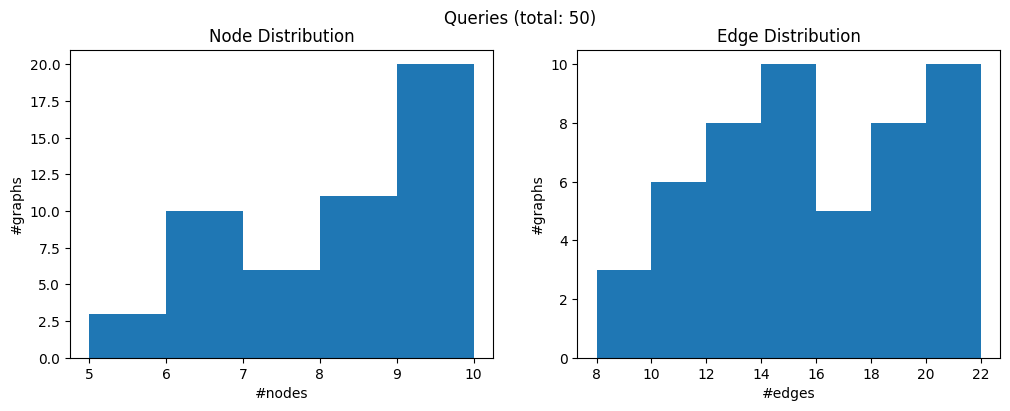

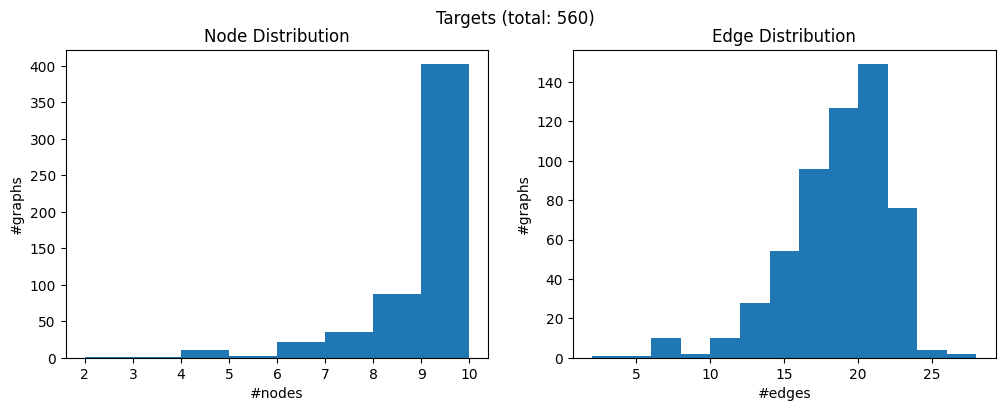

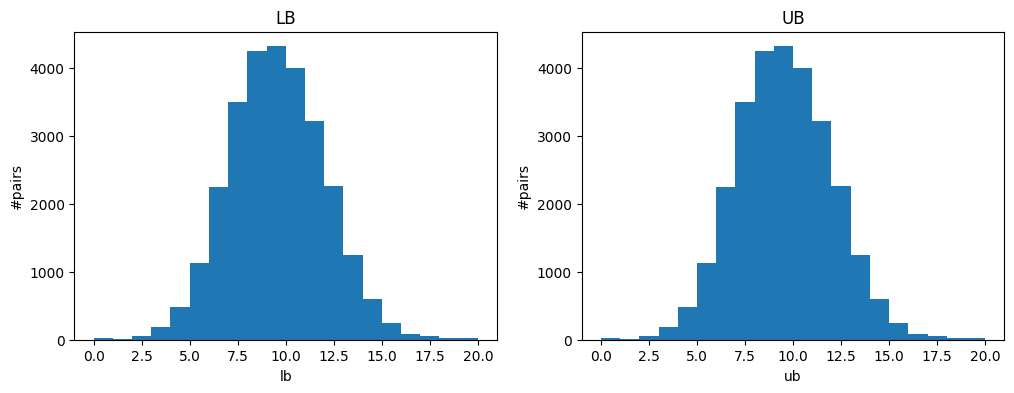

In [24]:
viz.plot_dataset_dist(outer_test_set)

In [25]:
config.n_workers = 1
tic = time.time()
outer_pred = model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(outer_pred, f'../preds/{NAME}/outer_pred.pt')
print(f'NeuroGSim prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim prediction time: 0.024 s


In [26]:
tic = time.time()
norm_outer_pred = norm_model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(norm_outer_pred, f'../preds/{NAME}/norm_outer_pred.pt')
print(f'NeuroGSim-Norm prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim-Norm prediction time: 0.018 s


In [27]:
tic = time.time()
nn_outer_pred = nn_model.predict_outer(outer_queries, outer_targets, batch_size=None)
toc = time.time()
torch.save(nn_outer_pred, f'../preds/{NAME}/nn_outer_pred.pt')
print(f'NeuroGSim-NN prediction time: {toc-tic:.3f} s')

direct predict outer dataset
NeuroGSim-NN prediction time: 0.017 s


In [28]:
# tic = time.time()
# dual_outer_pred = dual_model.predict_outer(outer_queries, outer_targets, batch_size=None)
# toc = time.time()
# torch.save(dual_outer_pred, f'../preds/{NAME}/dual_outer_pred.pt')
# print(f'NeuroGSim-Dual prediction time: {toc-tic:.3f} s')

In [29]:
# torch.save(b_inner_pred.view(len(outer_queries), len(outer_targets)), f'../preds/{NAME}/b_outer_pred.pt')

In [30]:
# torch.save(f2_inner_pred.view(len(outer_queries), len(outer_targets)), f'../preds/{NAME}/f2_outer_pred.pt')

In [31]:
config.n_workers = 64
config.method_name = ['ged_branch']
config.method_args = ['']
tic = time.time()
b_outer_lb, b_outer_ub = datasets.outer_sed(outer_queries, outer_targets)
b_outer_pred = (b_outer_lb + b_outer_ub)/2
toc = time.time()
torch.save(b_outer_pred, f'../preds/{NAME}/b_outer_pred.pt')
print(f'Branch prediction time: {toc-tic:.3f} s')

compute outer sed
n_workers: 64
method_name: ['ged_branch']
method_args: ['']


pairs: 100%|██████████| 28000/28000 [00:01<00:00, 14348.81it/s]


Branch prediction time: 4.761 s


In [32]:
config.n_workers = 64
config.method_name = ['ged_f2']
config.method_args = ['--time-limit 0.1']
tic = time.time()
f2_outer_lb, f2_outer_ub = datasets.outer_sed(outer_queries, outer_targets)
f2_outer_pred = (f2_outer_lb + f2_outer_ub)/2
toc = time.time()
torch.save(f2_outer_pred, f'../preds/{NAME}/f2_outer_pred.pt')
print(f'F2 prediction time: {toc-tic:.3f} s')

compute outer sed
n_workers: 64
method_name: ['ged_f2']
method_args: ['--time-limit 0.1']


pairs:   0%|          | 58/28000 [00:00<00:52, 533.66it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   0%|          | 132/28000 [00:00<00:42, 650.69it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   1%|          | 269/28000 [00:00<00:45, 605.32it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   1%|▏         | 391/28000 [00:00<00:48, 564.53it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   2%|▏         | 508/28000 [00:00<00:48, 564.65it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   3%|▎         | 747/28000 [00:01<00:32, 849.43it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   4%|▍         | 1052/28000 [00:01<00:24, 1083.37it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   5%|▍         | 1383/28000 [00:01<00:20, 1309.87it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   6%|▌         | 1595/28000 [00:01<00:17, 1538.03it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   6%|▋         | 1751/28000 [00:01<00:22, 1145.63it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   7%|▋         | 1881/28000 [00:02<00:31, 834.16it/s] 

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   7%|▋         | 1986/28000 [00:02<00:36, 717.02it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   7%|▋         | 2074/28000 [00:02<00:39, 663.63it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   8%|▊         | 2152/28000 [00:02<00:43, 597.06it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   8%|▊         | 2307/28000 [00:02<00:40, 627.59it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:   9%|▉         | 2497/28000 [00:03<00:34, 730.76it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  10%|▉         | 2666/28000 [00:03<00:34, 742.43it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  10%|█         | 2886/28000 [00:03<00:28, 896.79it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  13%|█▎        | 3754/28000 [00:04<00:53, 451.15it/s] 

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  14%|█▍        | 3882/28000 [00:05<00:50, 476.63it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  15%|█▌        | 4295/28000 [00:05<00:29, 807.67it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  16%|█▌        | 4474/28000 [00:05<00:29, 794.92it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  17%|█▋        | 4637/28000 [00:06<00:33, 698.16it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  17%|█▋        | 4710/28000 [00:06<00:33, 698.80it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  17%|█▋        | 4851/28000 [00:06<00:35, 646.01it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  18%|█▊        | 4981/28000 [00:06<00:39, 588.57it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  18%|█▊        | 5099/28000 [00:06<00:40, 559.39it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  19%|█▊        | 5213/28000 [00:07<00:41, 542.81it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  19%|█▉        | 5323/28000 [00:07<00:43, 518.15it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  19%|█▉        | 5439/28000 [00:07<00:43, 520.64it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  20%|█▉        | 5494/28000 [00:07<00:42, 525.50it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  20%|██        | 5646/28000 [00:07<00:38, 587.47it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  21%|██        | 5825/28000 [00:08<00:31, 693.61it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  21%|██▏       | 5996/28000 [00:08<00:30, 732.34it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  22%|██▏       | 6144/28000 [00:08<00:31, 689.45it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  22%|██▏       | 6214/28000 [00:08<00:34, 635.00it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  23%|██▎       | 6341/28000 [00:09<00:39, 543.99it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  23%|██▎       | 6460/28000 [00:09<00:40, 535.06it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  23%|██▎       | 6570/28000 [00:09<00:40, 524.10it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  24%|██▍       | 6681/28000 [00:09<00:40, 525.61it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  24%|██▍       | 6816/28000 [00:09<00:36, 578.61it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  28%|██▊       | 7850/28000 [00:11<00:26, 751.51it/s] 

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  29%|██▊       | 8033/28000 [00:11<00:29, 686.67it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  29%|██▉       | 8189/28000 [00:11<00:28, 689.21it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  30%|██▉       | 8335/28000 [00:12<00:31, 628.02it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  30%|███       | 8467/28000 [00:12<00:30, 630.43it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  31%|███       | 8544/28000 [00:12<00:30, 635.91it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  31%|███       | 8701/28000 [00:12<00:28, 687.68it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  32%|███▏      | 8842/28000 [00:12<00:29, 657.85it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  32%|███▏      | 8991/28000 [00:13<00:27, 681.22it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  33%|███▎      | 9173/28000 [00:13<00:24, 769.62it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  33%|███▎      | 9326/28000 [00:13<00:25, 722.70it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  34%|███▍      | 9490/28000 [00:13<00:24, 766.62it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  35%|███▍      | 9698/28000 [00:13<00:21, 866.80it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  35%|███▌      | 9904/28000 [00:14<00:19, 922.65it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  36%|███▌      | 9997/28000 [00:14<00:21, 856.96it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  36%|███▋      | 10169/28000 [00:14<00:24, 721.32it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  37%|███▋      | 10245/28000 [00:14<00:27, 646.49it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  37%|███▋      | 10378/28000 [00:14<00:30, 579.56it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  37%|███▋      | 10496/28000 [00:15<00:31, 561.60it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  38%|███▊      | 10553/28000 [00:15<00:33, 526.43it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  38%|███▊      | 10757/28000 [00:15<00:22, 766.04it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  39%|███▉      | 11000/28000 [00:15<00:18, 935.97it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  40%|████      | 11208/28000 [00:15<00:17, 940.01it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  44%|████▍     | 12273/28000 [00:18<00:50, 312.66it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  44%|████▍     | 12449/28000 [00:18<00:30, 516.17it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  45%|████▌     | 12602/28000 [00:18<00:25, 615.69it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  46%|████▌     | 12783/28000 [00:18<00:20, 739.24it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  46%|████▌     | 12941/28000 [00:18<00:22, 682.44it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  46%|████▋     | 13013/28000 [00:19<00:24, 616.30it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  47%|████▋     | 13144/28000 [00:19<00:25, 593.05it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  47%|████▋     | 13263/28000 [00:19<00:26, 553.38it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  48%|████▊     | 13375/28000 [00:19<00:28, 512.15it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  48%|████▊     | 13517/28000 [00:19<00:24, 590.43it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  49%|████▊     | 13638/28000 [00:20<00:24, 584.14it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  49%|████▉     | 13774/28000 [00:20<00:23, 608.76it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  49%|████▉     | 13841/28000 [00:20<00:22, 623.10it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  50%|████▉     | 13963/28000 [00:20<00:24, 572.16it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  50%|█████     | 14098/28000 [00:20<00:23, 587.98it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  51%|█████     | 14216/28000 [00:21<00:23, 574.61it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  51%|█████     | 14337/28000 [00:21<00:26, 506.15it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  52%|█████▏    | 14462/28000 [00:21<00:24, 550.78it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  52%|█████▏    | 14519/28000 [00:21<00:25, 532.46it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  52%|█████▏    | 14699/28000 [00:21<00:19, 678.41it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  53%|█████▎    | 14840/28000 [00:22<00:19, 689.18it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  53%|█████▎    | 14979/28000 [00:22<00:19, 652.80it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  54%|█████▍    | 15138/28000 [00:22<00:20, 632.96it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  58%|█████▊    | 16127/28000 [00:24<00:37, 314.83it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  58%|█████▊    | 16225/28000 [00:24<00:33, 350.72it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  58%|█████▊    | 16349/28000 [00:25<00:26, 439.93it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  59%|█████▊    | 16447/28000 [00:25<00:25, 457.31it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  59%|█████▉    | 16551/28000 [00:25<00:23, 486.00it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  59%|█████▉    | 16650/28000 [00:25<00:24, 472.33it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  60%|█████▉    | 16759/28000 [00:25<00:23, 480.82it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  60%|██████    | 16911/28000 [00:26<00:18, 603.89it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  61%|██████    | 17044/28000 [00:26<00:19, 574.40it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  61%|██████    | 17113/28000 [00:26<00:19, 551.04it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  62%|██████▏   | 17267/28000 [00:26<00:17, 610.54it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  62%|██████▏   | 17399/28000 [00:26<00:17, 620.27it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  63%|██████▎   | 17523/28000 [00:27<00:18, 579.24it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  63%|██████▎   | 17583/28000 [00:27<00:17, 584.91it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  63%|██████▎   | 17710/28000 [00:27<00:18, 558.01it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  64%|██████▎   | 17824/28000 [00:27<00:18, 544.15it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  64%|██████▍   | 17945/28000 [00:27<00:17, 563.85it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  65%|██████▍   | 18063/28000 [00:28<00:17, 568.69it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  65%|██████▌   | 18202/28000 [00:28<00:16, 610.57it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  65%|██████▌   | 18322/28000 [00:28<00:17, 548.14it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  66%|██████▌   | 18440/28000 [00:28<00:17, 548.53it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  66%|██████▌   | 18501/28000 [00:28<00:16, 563.01it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  66%|██████▋   | 18612/28000 [00:29<00:18, 514.83it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  67%|██████▋   | 18731/28000 [00:29<00:17, 524.14it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  67%|██████▋   | 18838/28000 [00:29<00:18, 506.76it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  71%|███████   | 19829/28000 [00:31<00:21, 387.95it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  71%|███████   | 19940/28000 [00:31<00:17, 451.76it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  72%|███████▏  | 20051/28000 [00:32<00:15, 496.94it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  72%|███████▏  | 20190/28000 [00:32<00:13, 573.10it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  73%|███████▎  | 20325/28000 [00:32<00:13, 581.16it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  73%|███████▎  | 20483/28000 [00:32<00:11, 651.10it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  73%|███████▎  | 20570/28000 [00:32<00:10, 704.11it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  74%|███████▍  | 20721/28000 [00:33<00:11, 659.02it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  75%|███████▍  | 20880/28000 [00:33<00:09, 714.29it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  75%|███████▌  | 21038/28000 [00:33<00:10, 684.98it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  76%|███████▌  | 21180/28000 [00:33<00:10, 655.80it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  76%|███████▋  | 21350/28000 [00:33<00:09, 696.23it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  77%|███████▋  | 21421/28000 [00:34<00:09, 667.95it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  77%|███████▋  | 21557/28000 [00:34<00:10, 634.66it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  77%|███████▋  | 21687/28000 [00:34<00:10, 606.67it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  78%|███████▊  | 21811/28000 [00:34<00:10, 599.11it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  78%|███████▊  | 21931/28000 [00:34<00:10, 570.47it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  79%|███████▊  | 22044/28000 [00:35<00:11, 532.11it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  79%|███████▉  | 22159/28000 [00:35<00:10, 534.33it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  80%|███████▉  | 22266/28000 [00:35<00:11, 503.74it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  80%|███████▉  | 22370/28000 [00:35<00:11, 496.12it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  80%|████████  | 22444/28000 [00:35<00:10, 548.88it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  81%|████████  | 22627/28000 [00:36<00:09, 582.03it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  84%|████████▍ | 23557/28000 [00:38<00:11, 371.43it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  85%|████████▍ | 23672/28000 [00:38<00:09, 450.09it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  85%|████████▍ | 23773/28000 [00:38<00:09, 456.94it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  85%|████████▌ | 23893/28000 [00:38<00:08, 510.78it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  86%|████████▌ | 24003/28000 [00:38<00:08, 490.43it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  86%|████████▌ | 24123/28000 [00:39<00:07, 536.55it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  87%|████████▋ | 24232/28000 [00:39<00:07, 516.93it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  87%|████████▋ | 24350/28000 [00:39<00:06, 536.71it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  87%|████████▋ | 24405/28000 [00:39<00:06, 527.22it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  88%|████████▊ | 24520/28000 [00:39<00:06, 506.46it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  88%|████████▊ | 24628/28000 [00:40<00:06, 515.29it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  88%|████████▊ | 24737/28000 [00:40<00:06, 489.20it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  89%|████████▉ | 24855/28000 [00:40<00:05, 524.58it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  89%|████████▉ | 24962/28000 [00:40<00:05, 507.84it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  90%|████████▉ | 25074/28000 [00:41<00:05, 509.95it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  90%|█████████ | 25215/28000 [00:41<00:04, 618.81it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  91%|█████████ | 25484/28000 [00:41<00:02, 954.52it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  92%|█████████▏| 25717/28000 [00:41<00:02, 1067.27it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  92%|█████████▏| 25825/28000 [00:41<00:02, 824.30it/s] 

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  93%|█████████▎| 25917/28000 [00:42<00:03, 676.37it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  93%|█████████▎| 25995/28000 [00:42<00:03, 604.23it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  93%|█████████▎| 26132/28000 [00:42<00:03, 579.86it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12


pairs:  97%|█████████▋| 27169/28000 [00:43<00:01, 606.14it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  98%|█████████▊| 27477/28000 [00:44<00:00, 696.53it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  98%|█████████▊| 27558/28000 [00:44<00:00, 633.43it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  99%|█████████▉| 27696/28000 [00:44<00:00, 581.13it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs:  99%|█████████▉| 27758/28000 [00:44<00:00, 560.04it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs: 100%|█████████▉| 27874/28000 [00:45<00:00, 530.49it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs: 100%|█████████▉| 27980/28000 [00:45<00:00, 512.01it/s]

Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only - expires 2025-03-12
Academic license - for non-commercial use only -

pairs: 100%|██████████| 28000/28000 [00:45<00:00, 617.24it/s]


F2 prediction time: 48.221 s


### Write the results to the output file

In [ ]:
# # make an outer_logs directory if it doesn't exist
# if not os.path.exists(f'../preds/{NAME}/outer_logs'):
#     os.makedirs(f'../preds/{NAME}/outer_logs')
    

# log_file_unweighted = f'../preds/{NAME}/outer_logs/outer_test_unweighted_NORM_GED.log'
# log_file_weighted = f'../preds/{NAME}/outer_logs/outer_test_weighted_NORM_GED.log'
# log_file_nn_model = f'../preds/{NAME}/outer_logs/outer_test_nn_Neural_Siamese.log'

# csv_file_unweighted = f'../preds/{NAME}/outer_logs/outer_test_unweighted_NORM_GED.csv'
# csv_file_weighted = f'../preds/{NAME}/outer_logs/outer_test_weighted_NORM_GED.csv'
# csv_file_nn_model = f'../preds/{NAME}/outer_logs/outer_test_nn_Neural_Siamese.csv'

# viz.log_prediction_results(outer_test_set, outer_pred, logfile=log_file_unweighted)
# viz.log_prediction_results(outer_test_set, norm_outer_pred, logfile=log_file_weighted)
# viz.log_prediction_results(outer_test_set, nn_outer_pred, logfile=log_file_nn_model)

# viz.save_results_to_csv(outer_test_set, outer_pred, csvpath=csv_file_unweighted)
# viz.save_results_to_csv(outer_test_set, norm_outer_pred, csvpath=csv_file_weighted)
# viz.save_results_to_csv(outer_test_set, nn_outer_pred, csvpath=csv_file_nn_model)